<div style="border:inset orange 2px; padding: 20px">
    
<h2 style="color: cornflowerblue">Protection of Customer Personal Data<a class="tocSkip"></a></h2>
    
The task is to protect the data of customers of the insurance company.

**Project Goal** - to develop a data transformation method that makes it difficult to reconstruct personal information from the data. The goal is to protect the data while ensuring that the quality of machine learning models does not degrade.

**Research Process**

The research will be conducted in 6 stages:

- 1. Data Overview.
- 2. Matrix Multiplication.
   - 2.1. Evaluating the impact on the linear regression quality when multiplying features by an invertible matrix.
- 3. Proposal of Transformation Algorithm.
- 4. Algorithm Testing.
- 5. Data Decoding.
- 6. General Conclusion.

**Data Description**

* Features: gender, age, insured person's salary, number of family members.
* Target Feature: the number of insurance benefits to the client in the last 5 years.
    
<img src="https://img.freepik.com/free-vector/global-data-security-personal-data-security-cyber-data-security-online-concept-illustration-internet-security-information-privacy-protection_1150-37375.jpg" width="500" height="500" alt="Security" />

## Data Overview

In [24]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 

In [25]:
# Setting parameters

sns.set_style("whitegrid")

In [26]:
# Reading the data file and storing it in the variable df

df = pd.read_csv('./insurance.csv')

Now we proceed to explore the available data.

In [27]:
# Displaying the first 5 rows of the dataframe

df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [28]:
# Renaming column names in English

df = df.rename(
    columns={
        'Пол': 'Gender',
        'Возраст': 'Age',
        'Зарплата': 'Salary',
        'Члены семьи': 'Family Members',
        'Страховые выплаты': 'Insurance benefits'
    }
)

In [29]:
# Displaying general information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family Members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [30]:
# Displaying feature characteristics

df.describe()

,Gender,Age,Salary,Family Members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


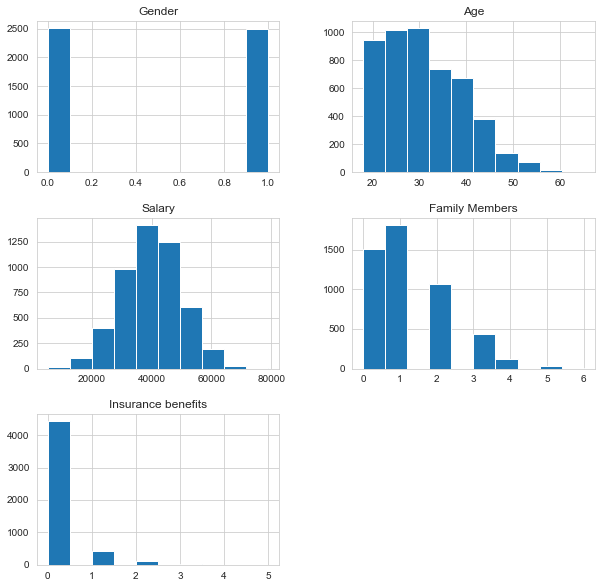

In [31]:
# Data distribution

df.hist(figsize=(10, 10));

**Conclusion**. All the data is numerical. There are no missing values in the data. Judging by the standard deviation (std) values, the values are scattered. According to the distribution of values in the features, the following has been observed: the number of male and female insured individuals is roughly the same, with the majority of insured individuals being between 20 to 30 years old and having a salary level of 30,000 to 50,000 rubles. The majority of insured individuals are either single or have one family member. Most clients have not received insurance benefits.

Data preprocessing is not required; the data is ready for further analysis.

## Matrix Multiplication

According to the task conditions, we need to protect the data while ensuring that the quality of machine learning models does not degrade. First, I will train a linear regression model and evaluate its performance on the original data.

I will create variables for features and target features.

In [32]:
features = df.drop('Insurance benefits', axis=1)
target = df['Insurance benefits']

Then, I will train a linear regression using sklearn.

In [33]:
model = LinearRegression()

# Training the linear regression model

model.fit(features, target)

# Predicting the target variable

predictions = model.predict(features)

# Calculating the R2 metric

print(r2_score(target, predictions))

0.4249455028666801


Next, using numpy's matrix operations, I will write an analytical solution for linear regression.

In [34]:
# Creating the LinearRegression class

class LinearRegression:
    
    # fit() method, which takes features and target features as input
    
    def fit(self, features, target):
        
        # Adding a column of ones to features
        
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
        y = target
        
        # Calculating the model weights using the method of least squares
        
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
        # Weight separation
        
        self.w = w[1:]
        self.w0 = w[0]
        
    # predict() method to calculate the prediction of linear regression

    def predict(self, features):
        return features.dot(self.w) + self.w0

# Creating a data structure object

model = LinearRegression()

# Training the model

model.fit(features, target)

# Getting predictions

predictions = model.predict(features)

# Calculating the R2 metric

r2_score_original = r2_score(target, predictions)

# Displaying R2

print('R2 on the original data:', r2_score_original)

R2 on the original data: 0.4249455028666801


**Conclusion**. I trained a linear regression using sklearn and wrote an analytical solution using numpy on the same data, and obtained the same coefficient of determination (R2) equal to 0.4249.

### Evaluating the Impact on Linear Regression Quality When Multiplying Features by an Invertible Matrix

The features are multiplied by an invertible matrix. Will the quality of linear regression change?

Notation:

- $X$ — feature matrix (the zero column consists of ones)

- $y$ — target feature vector

- $P$ — the matrix by which features are multiplied

- $w$ — linear regression weights vector (the zero element equals the bias)

Predictions:

$$
a = Xw
$$

Training Task:

$$
w = \arg\min_w MSE(Xw, y)
$$

Training Formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Answer:** It will not change.

**Justification:** If the features are multiplied by an invertible matrix P, then the quality of linear regression will not change because the matrix P is invertible, and multiplying the features by it does not change the original data. The predictions and model weights will be changed, but it will not affect the quality of linear regression as they will be computed anew using the new data. The parameters of linear regression in the original task and the transformed task will be related in that they will rely on the same data but will be computed differently. I will prove this statement using formulas.

Let's multiply the features by an invertible matrix P.

Predictions for transformed data:

$$
a' = XPw'
$$

Training Formula:
$$
w' = ((XP)^T XP)^{-1} (XP)^T y,
$$

Substitute the training formula into predictions:

$$
a'= XP((XP)^T XP)^{-1} (XP)^T y,
$$

Next, when expanding the parentheses $(XP)^T$ I group them into $X^T$ and $X$ since I do not know if the feature matrix X is square, but I know that $(X^T X)$ is a square matrix.

$$
a' = XP(P^T (X^T X) P)^{-1} (XP)^T y
$$

$$
a' = XP(P^T (X^T X) P)^{-1} P^T X^T y
$$

$$
a' = XP P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Since $PP^{-1} = E$ and $(P^T)^{-1} P^T = E$ (identity matrices), then:

$$
a' = X(X^T X)^{-1} X^T y
$$

Thus,

$$
a' = a
$$

**Conclusion**. As a result, I obtained an equality of predictions. This means that the model quality will not change, as the transformation of the feature matrix X by the matrix P does not alter the data properties; it only changes the representation of the data.

## Data Transformation Algorithm

**Algorithm**

One of the possible data transformation algorithms to make it difficult to recover customers' personal information is scaling the data using standardization and using matrix operations. I can create a random invertible matrix and multiply it by the original data to obtain the transformed data. This will change the feature values but not their relationships, ensuring that the quality of linear regression remains unchanged.

1. Transform the data using feature scaling.
2. Generate a random matrix.
3. Compute the inverse of the generated matrix.
4. Multiply the feature matrix by the created inverse matrix.
5. Use a linear regression model for training and prediction on the transformed data.

**Justification**

This data transformation algorithm allows to modify the original data in such a way that recovering customers' personal information becomes difficult. This is achieved by using a random invertible matrix, which alters the data structure and makes it incomprehensible to humans. However, the quality of linear regression remains unchanged, as matrix operations do not affect the relationship between the target variable and predictors.

## Algorithm Verification

First, I will scale the data. Applying StandardScaler guarantees that each feature will have a mean of 0 and a variance of 1, resulting in all features having the same scale.

In [35]:
# Creating the scaler object

scaler = StandardScaler()

# Data normalization

features_scaled = scaler.fit_transform(features)

Next, I will create a matrix from the available features.

In [36]:
# Creating a matrix using NumPy array

features_matrix = np.array(features_scaled)

# Displaying the matrix

features_matrix

array([[ 1.002002  ,  1.19043179,  0.97823503, -0.17795659],
       [-0.998002  ,  1.78285146, -0.19358944, -0.17795659],
       [-0.998002  , -0.23137543, -1.91091841, -1.09431388],
       ...,
       [-0.998002  , -1.29773084, -0.60776878,  0.7384007 ],
       [ 1.002002  , -1.06076297, -0.728992  ,  1.654758  ],
       [ 1.002002  , -0.34985936,  0.06906087, -0.17795659]])

I will create a random matrix, compute its inverse, and transform the data by multiplying the feature matrix by the created inverse matrix.

In [37]:
# Generating a random matrix

random_matrix = np.random.rand(features_matrix.shape[1], features_matrix.shape[1])

# Computing its inverse matrix

random_matrix = np.linalg.inv(random_matrix)

# Data transformation

transformed_df = features_matrix @ random_matrix

# Displaying the transformed data

transformed_df

array([[ -5.44801677,   7.66107132,   3.22080017,  -3.90617536],
       [ -4.81461818,  -0.43467206,   5.44270795,  -0.59306613],
       [ -5.25297287,   4.11962556,   2.65846123,  -3.67497673],
       ...,
       [  8.49773276, -11.87920052,  -4.65496331,   6.76115195],
       [ -0.99048122,  -2.53196931,  -1.9419239 ,   4.5386368 ],
       [ -2.84956178,   6.35796722,  -0.13187029,  -2.92881842]])

I will convert the matrix back to a DataFrame.

In [38]:
transformed_df = pd.DataFrame(transformed_df)

# Performing the verification and displaying the first 5 rows of the DataFrame

transformed_df.head()

,0,1,2,3
0,-5.448017,7.661071,3.220800,-3.906175
1,-4.814618,-0.434672,5.442708,-0.593066
2,-5.252973,4.119626,2.658461,-3.674977
3,11.806188,-13.894211,-5.866542,7.538241
4,-11.261161,15.374847,3.384507,-8.400267


Now i will check the quality of linear regression after transformation.

In [39]:
# Creating the structure data object

model_transformed_df = LinearRegression()

# Model training

model_transformed_df.fit(transformed_df, target)

# Obtaining the prediction

prediction_transformed = model_transformed_df.predict(transformed_df)

# Calculating the R2 metric

r2_score_transformed = r2_score(target, prediction_transformed)

# Displaying R2

print('R2 on the transformed data:', r2_score_transformed)

R2 on the transformed data: 0.42494550286668


I will compare the quality of linear regression before and after the transformation.

In [40]:
# Passing the results to the DataFrame constructor()

results = pd.DataFrame({'R2 score' : [r2_score_original, r2_score_transformed]})

# Setting names for the indices

results.index = ['On original data', 'On transformed data']

# Displaying the table

display(results)

,R2 score
On original data,0.424946
On transformed data,0.424946


**Conclusion**. The quality of linear regression before and after the transformation remained unchanged.

## Data Decoding

The transformation algorithm has been verified, and now we can recover the original data. 

To decode the data, we need to use the inverse matrix $P^{-1}$. To do this, we multiply the transformed matrix transformed_df by the inverse matrix $P^{-1}$.

In [41]:
decrypted_df = transformed_df @ np.linalg.inv(random_matrix)

I will restore the normalized data using the scaler.inverse_transform method.

In [42]:
decrypted_df = scaler.inverse_transform(decrypted_df).astype(int)

I will convert the features back to a DataFrame.

In [43]:
decrypted_df = pd.DataFrame(decrypted_df)

# Setting column names as in the original data

decrypted_df.columns = features.columns

I will perform a check after data restoration.

In [44]:
decrypted_df.head()

,Gender,Age,Salary,Family Members
0,1,41,49600,1
1,0,46,38000,1
2,0,29,20999,0
3,0,21,41699,2
4,1,28,26100,0


For comparison, I will display the original features.

In [45]:
features.head()

,Gender,Age,Salary,Family Members
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


The feature values match, and the data has been successfully restored.

## General Conclusion

During the research, the following work was accomplished:

* Data exploration.
* Linear regression model training and evaluation of its quality on the original data.
* Analysis of how linear regression quality changes when multiplying the matrix by a random invertible matrix.
* Proposal of a transformation algorithm.
* Implementation of the proposed data transformation algorithm using matrix operations.
* Comparison of linear regression quality before and after the transformation.
* Data restoration.

The work allowed making the following conclusions:

* No data preprocessing was required, and the data is correct.
* It was demonstrated that when multiplying the matrix by a random invertible matrix, the quality of linear regression does not change.
* The proposed transformation algorithm involves data normalization and the use of matrix operations. The algorithm did not alter the quality of linear regression, meeting the requirements of the task.

Thus, this data transformation method can be used to protect the personal data of the insurance company's clients. However, it is worth noting that more advanced data protection methods, such as encryption and anonymization, can also be used, and security systems should be regularly reviewed.